In [1]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 作業フォルダへの移動を行います。
# 人によって作業場所がことなるので、その場合作業場所を変更してください。
import os
os.chdir('/content/drive/MyDrive/100knock-data_analytics/3章') #ここを変更。

In [3]:
# # もしプログラムがエラーになったりした場合、ライブラリのVersionの違いが考えられます。
# # その場合は下記のコメントアウトを外して実行することで、執筆時のVersionがインストールされます。
# # 通常時は実行する必要ありません。
# !pip install -r requirements.txt

# 3章 顧客の全体像を把握する１０本ノック

ここでは、スポーツジムの会員データを使って顧客の行動を分析していきます。  
これまでと同様にまずはデータを理解し、加工した後、  
顧客の行動データを分析していきましょう。  
ここでは、機械学習に向けての初期分析を行います。

### ノック21：データを読み込んで把握しよう

In [4]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [5]:
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [6]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [7]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


### ノック22：顧客データを整形しよう

In [8]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [9]:
print(len(customer))
print(len(customer_join))

4192
4192


In [10]:
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


### ノック23：顧客データの基礎集計をしよう

In [11]:
customer_join.groupby("class_name").count()["customer_id"]

,customer_id
class_name,
オールタイム,2045
デイタイム,1019
ナイト,1128


In [12]:
customer_join.groupby("campaign_name").count()["customer_id"]

,customer_id
campaign_name,
入会費半額,650
入会費無料,492
通常,3050


In [13]:
customer_join.groupby("gender").count()["customer_id"]

,customer_id
gender,
F,1983
M,2209


In [14]:
customer_join.groupby("is_deleted").count()["customer_id"]

,customer_id
is_deleted,
0,2842
1,1350


In [15]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]
print(len(customer_start))

1361


### ノック24：最新顧客データの基礎集計をしよう

In [16]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [17]:
customer_newer.groupby("class_name")[["customer_id"]].count()

,customer_id
class_name,
オールタイム,1444
デイタイム,696
ナイト,813


In [18]:
customer_newer.groupby("campaign_name")[["customer_id"]].count()

,customer_id
campaign_name,
入会費半額,311
入会費無料,242
通常,2400


In [19]:
customer_newer.groupby("gender")[["customer_id"]].count()

,customer_id
gender,
F,1400
M,1553


### ノック25：利用履歴データを集計しよう

In [20]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [21]:
uselog_months

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [22]:
uselog_customer = uselog_months.groupby("customer_id", as_index=False).agg(
    mean=('count', 'mean'),
    median=('count', 'median'),
    max=('count', 'max'),
    min=('count', 'min')
)
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,index,customer_id,mean,median,max,min
0,0,AS002855,4.500000,5.0,7,2
1,1,AS008805,4.000000,4.0,8,1
2,2,AS009013,2.000000,2.0,2,2
3,3,AS009373,5.083333,5.0,7,3
4,4,AS015233,7.545455,7.0,11,4


### ノック26：利用履歴データから定期利用フラグを作成しよう

In [23]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id","年月","weekday"], as_index=False)[["log_id"]].count()
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [24]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False)[["count"]].max()
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


### ノック27：顧客データと利用履歴データを結合しよう

In [25]:
uselog_customer

,index,customer_id,mean,median,max,min
0,0,AS002855,4.500000,5.0,7,2
1,1,AS008805,4.000000,4.0,8,1
2,2,AS009013,2.000000,2.0,2,2
3,3,AS009373,5.083333,5.0,7,3
4,4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...,...
4187,4187,TS995853,9.500000,9.5,11,8
4188,4188,TS998593,8.142857,8.0,9,7
4189,4189,TS999079,4.916667,5.5,9,2
4190,4190,TS999231,4.666667,5.0,8,1


In [26]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,index,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3036,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3256,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3111,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1006,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,1331,3.916667,4.0,6,1,1


In [27]:
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


### ノック28：会員期間を計算しよう

In [28]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join.loc[i,"membership_period"] = delta.years*12 + delta.months
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,index,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3036,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3256,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3111,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1006,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,1331,3.916667,4.0,6,1,1,2019-04-30,47


### ノック29：顧客行動の各種統計量を把握しよう

In [29]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [30]:
customer_join.groupby("routine_flg")[["customer_id"]].count()

,customer_id
routine_flg,
0,779
1,3413


(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

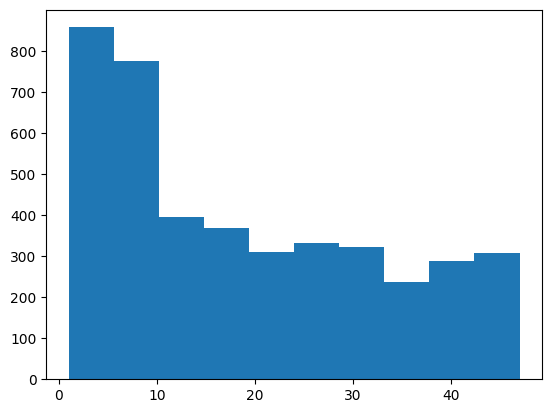

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

### ノック30：退会ユーザーと継続ユーザーの違いを把握しよう

In [32]:
customer_end = customer_join.select_dtypes(include='number').loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,index,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,2030.260000,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1209.012998,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,966.500000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,2019.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,3037.250000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,4184.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [33]:
customer_stay = customer_join.select_dtypes(include='number').loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,index,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,2126.490148,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1209.847743,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,0.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,1075.250000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,2131.500000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,3183.750000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,4191.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [34]:
customer_join.to_csv("customer_join.csv", index=False)